1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.optimize as opt
from scipy import stats

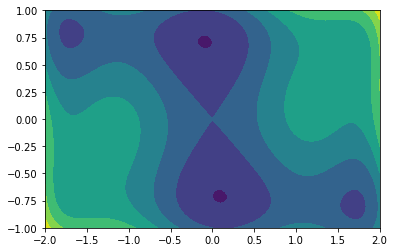

In [3]:
#define Func
def f(x,y):
    return (4-2.1*(x**2)+(1/3)*(x**4))*(x**2)+x*y+(y**2)*4*(y**2-1)
def g(z):
    return (4-2.1*(z[0]**2)+(1/3)*(z[0]**4))*(z[0]**2)+z[0]*z[1]+(z[1]**2)*4*(z[1]**2-1)

x = np.linspace(-2,2,150)
y = np.linspace(-1,1,150)
x2,y2 = np.meshgrid(x,y)
w = f(x2,y2)
plt.contourf(x,y,w)
plt.show()

In [7]:
#initial guess
x1=[0,0]
opt.minimize(g,x1)

      fun: 0.0
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([ 5.96046448e-08, -5.96046448e-08])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

In [8]:
x2=[1,1]
opt.minimize(g,x2)

      fun: -1.031628453489845
 hess_inv: array([[ 0.12963409, -0.00844697],
       [-0.00844697,  0.06238693]])
      jac: array([-2.5331974e-07,  9.9837780e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 13
     njev: 18
   status: 0
  success: True
        x: array([ 0.08984197, -0.71265635])

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

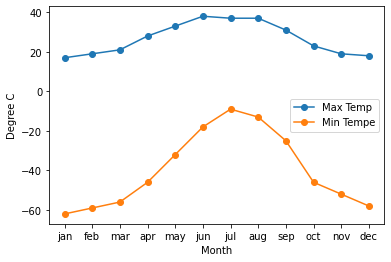

In [12]:
labels = ['jan','feb','mar','apr','may','jun', 'jul','aug','sep', 'oct', 'nov', 'dec']
temp_max=np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
temp_min=np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])


x = np.linspace(1, 12, 12)

fig, ax = plt.subplots(1,1)
ax.plot_date(x, temp_max, linestyle='solid', label="Max Temp")
ax.plot_date(x, temp_min, linestyle='solid', label="Min Tempe")
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("Degree C")
plt.legend()
plt.show()

[52.64929217  7.16452596  7.80836293 38.67906327]
[[ 1.96936235e+00 -8.73501421e-04  1.79558662e-01 -1.05130247e+00]
 [-8.73501421e-04  2.22849932e-03 -3.89293865e-04  1.09101523e-03]
 [ 1.79558662e-01 -3.89293865e-04  3.60637375e-01 -5.58403736e-01]
 [-1.05130247e+00  1.09101523e-03 -5.58403736e-01  1.41330583e+00]]
[23.0920807   6.73581603 10.52885631 15.77932934]
[[ 1.32863833e+00 -1.60409794e-03  9.31303608e-01 -1.08336212e+00]
 [-1.60409794e-03  6.31512658e-03 -1.94765395e-03  1.91632237e-03]
 [ 9.31303608e-01 -1.94765395e-03  2.31997699e+00 -1.56873189e+00]
 [-1.08336212e+00  1.91632237e-03 -1.56873189e+00  1.38428164e+00]]


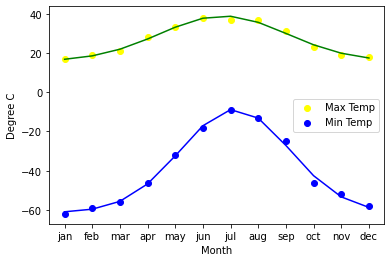

In [16]:
def f(x, a, b, c,d):
    return a*np.exp(-(x-b)**2/c)+d

par_min,par_min_covariance = opt.curve_fit(f, x, temp_min+100)
par_max,par_max_covariance = opt.curve_fit(f, x, temp_max)

print(par_min)
print (par_min_covariance)
print(par_max)
print (par_max_covariance)

fig, ax = plt.subplots(1,1)
ax.plot(x,f(x, par_max[0], par_max[1], par_max[2], par_max[3]), color='green')
ax.scatter(x,temp_max,label="Max Temp",color='Yellow')
ax.scatter(x,temp_min,label="Min Temp",color='blue')
ax.plot(x,f(x, par_min[0], par_min[1], par_min[2], par_min[3])-100,color='blue')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.xlabel("Month")
plt.ylabel("Degree C")
plt.legend()
plt.show()
#Answering Questions: 

#1. According to the plot, Yes, the fit is reasonable.
#2. No, they are different.

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [17]:
file = pd.read_pickle('residuals_261.pkl')
data_pickle = np.array(file, ndmin=1)
data = data_pickle[0]
df = pd.DataFrame(data)
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


Text(0, 0.5, 'Entries')

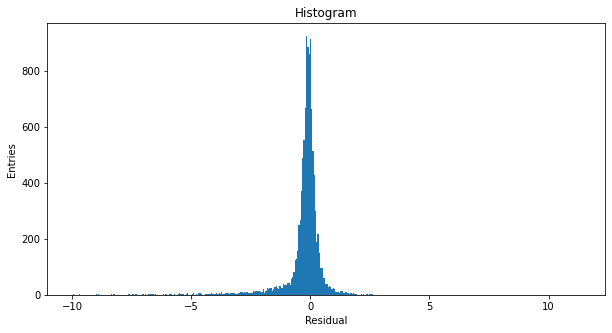

In [22]:
df = df[df['residuals'] > -15]
fig, ax = plt.subplots(figsize=(10,5))
h, bins, _ = plt.hist(df['residuals'], bins=400)

ax.set_title('Histogram')
ax.set_xlabel('Residual')
ax.set_ylabel('Entries')

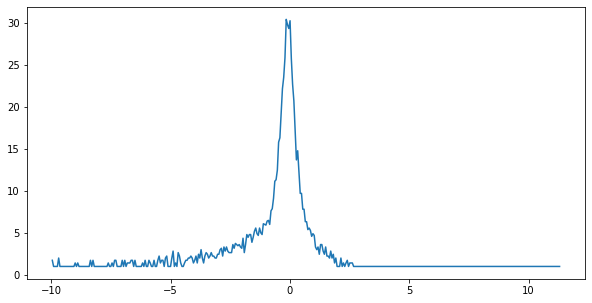

In [23]:
fig, ax = plt.subplots(figsize=(10,5))

centers = 0.5 * (bins[:-1] + bins[1:])
sigma_i = np.sqrt(np.abs(h))
sigma_i[sigma_i == 0] = 1 # in this way we can solve the NaN values

ax.plot(centers, sigma_i)

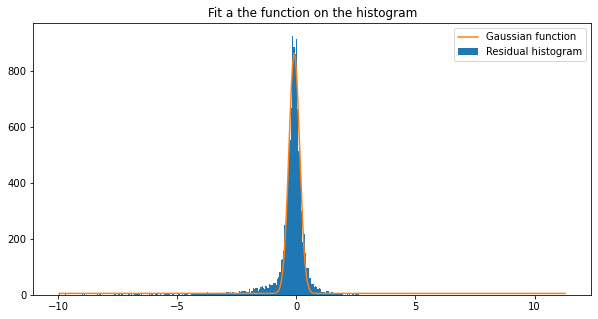

In [25]:
def fgauss(x, H, A, y, sigma):
    return H + A * np.exp(-(x - y) ** 2 / (2 * sigma ** 2))

params, params_cov = opt.curve_fit(fgauss, centers, h, full_output=False)

fig, ax = plt.subplots(figsize=(10, 5))

plt.hist(df['residuals'], bins=400, label='Residual histogram')
plt.plot(centers, fgauss(centers, *params), label='Gaussian function')

ax.set_title('Fit a the function on the histogram')
ax.legend()

In [27]:
ndof = len(centers) - 1
print("n degrees of freedom =", ndof)
# calculate the chi to the power of 2
chi2 = np.sum(((h - fgauss(centers, *params))**2) / sigma_i)
print("chi2 =", chi2)
# calculate the p-value from the chi^2, the n.d.o.f., and the comulative chi^2 distribution
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print("p-value =", pvalue) # if the p-value is < 0.05, the fit is not acceptable.

n degrees of freedom = 399
chi2 = 13888.100567204005
p-value = 0.0


4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

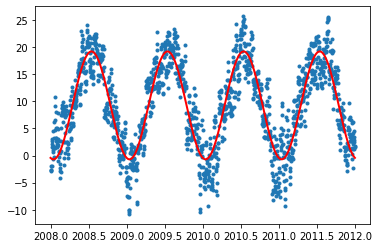

In [6]:
date, temp = np.loadtxt('munich_temperatures_average_with_bad_data.txt', unpack=True)

keep = (np.abs(date) >= 2008) & (np.abs(date) <2012) & (np.abs(temp) < 80) #below 80 degree
date = date[keep] 
temp = temp[keep]

def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

popt, pcov = opt.curve_fit(f, date, temp)

plt.plot(date, temp, '.')
x = np.linspace(2008, 2012, len(temp))
plt.plot(x, f(x, *popt), color='red', lw=2)

In [8]:
print("parameters:", popt)
print("covariance matrix:\n", pcov)
print("a = %.2f +- %.2f" % (popt[0], np.sqrt(pcov[0,0])))
print("b = %.2f +- %.2f" % (popt[1], np.sqrt(pcov[1,1])))
print("c = %.2f +- %.2f" % (popt[2], np.sqrt(pcov[2,2])))

parameters: [-9.96203467 12.33174286  9.26282131]
covariance matrix:
 [[ 1.75558202e-02  9.86007919e-07 -2.76510342e-06]
 [ 9.86007919e-07  1.77329886e-04  5.40552783e-08]
 [-2.76510342e-06  5.40552783e-08  8.78853325e-03]]
a = -9.96 +- 0.13
b = 12.33 +- 0.01
c = 9.26 +- 0.09


In [10]:
avg_temp = temp.mean()

print('Overall average temper: ', avg_temp)

Overall average temper:  9.261252084167237


In [14]:
df1 = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=' ', names=['Time', 'Temperature'])
df1[['Year', 'Day']] = df1['Time'].astype(str).str.split('.', expand=True).astype(int)

df2 = df1[df1['Year'].between(2008, 2011)] #as before
df2 = df2[df2['Temperature'] < 80]

avg_temp_max = df2.groupby('Year')['Temperature'].max().mean()
avg_temp_min = df2.groupby('Year')['Temperature'].min().mean()

print('The max average temp: ', avg_temp_max)
print('The min average temp: ', avg_temp_min)

The max average temp:  24.6389
The min average temp:  -8.625005


In [15]:
def f_new(t, a, b, c, d):
    return a * np.cos(2 * np.pi * t * b + c) + d

SSR: 18662.47749843538 18663.718123463917
Test fcos vs f_new:
CL: 1.000 , additional parameter necessary: NO


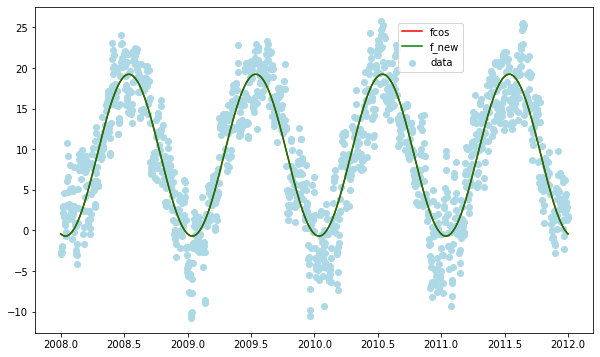

In [19]:
from scipy.stats import f

# define function for F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

N=len(temp)
x = np.linspace(2008, 2012, N)
y = temp

fig, ax = plt.subplots(figsize=(10, 6)) # create the figure and the axes
ax.scatter(date, temp, marker='o', c='lightblue', label="data")

popt1, pcov1 = opt.curve_fit(fcos, date, temp)
y1 = fcos(x, *popt1)
ax.plot(x, y1, color='r', label="fcos")
ssr_1 = np.sum((y1 - y)**2)

popt2, pcov2 = opt.curve_fit(f_new, date, temp)
y2 = f_new(x, *popt2)
ax.plot(x, y2, color='g', label="f_new")
ssr_2 = np.sum((y2 - y)**2)

ax.legend(loc=(0.65, 0.8))

print("SSR:", ssr_1, ssr_2)

# run F-test
# test f2 vs f1
print("Test fcos vs f_new:")
cl_1_vs_2 = Ftest(ssr_1, ssr_2, 2, 3, N, verbose=True)

We can see that the additional parameter is not needed. At the end, the best-fit values of the parameters are always: a = -9.96, b = 12.33, c = 9.26